In [63]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import robust_scale
import importlib

# Project imports
from src.mapping import ExperimentConfig, DatasetMapping
import src.generate
importlib.reload(src.generate)
from src import generate

config_path = pathlib.Path("configs/synthetic/experiments_full_4b.yaml")
target_class = "CauchyNoise"
seed_override = None 
cfg = ExperimentConfig.from_file(config_path)
mapping = DatasetMapping(cfg)

specs = [s for s in mapping.specs if s.mts_class == target_class]
if not specs:
    raise SystemExit(f"No specs for class {target_class}")

generated_data = []

print(f"[INFO] Generating {len(specs)} series for class {target_class}...")

for spec in specs:
    seed = seed_override if seed_override is not None else spec.rng_seed
    params = dict(spec.generator_params)
    
    # Specific override from your notebook
    if spec.generator == "cml_logistic":
        params["delta"] = 3
        
    ts = generate.generate_series(
        spec.generator,
        seed=seed,
        M=spec.M,
        T=spec.T,
        **params,
    )
    if ts.shape[0] > ts.shape[1]:
        ts = ts.T

    # if target_class == "CML":
    #     ts = ts[::3]

    ts = robust_scale(ts)
    # ts = zscore(ts)
    
    generated_data.append({
        "data": ts,
        "title": f"{spec.mts_class} M{spec.M} T{spec.T} I{spec.instance}"
    })

print("[INFO] Generation complete. Run the next cell to visualize.")

[INFO] Generating 48 series for class CauchyNoise...
[INFO] Generation complete. Run the next cell to visualize.


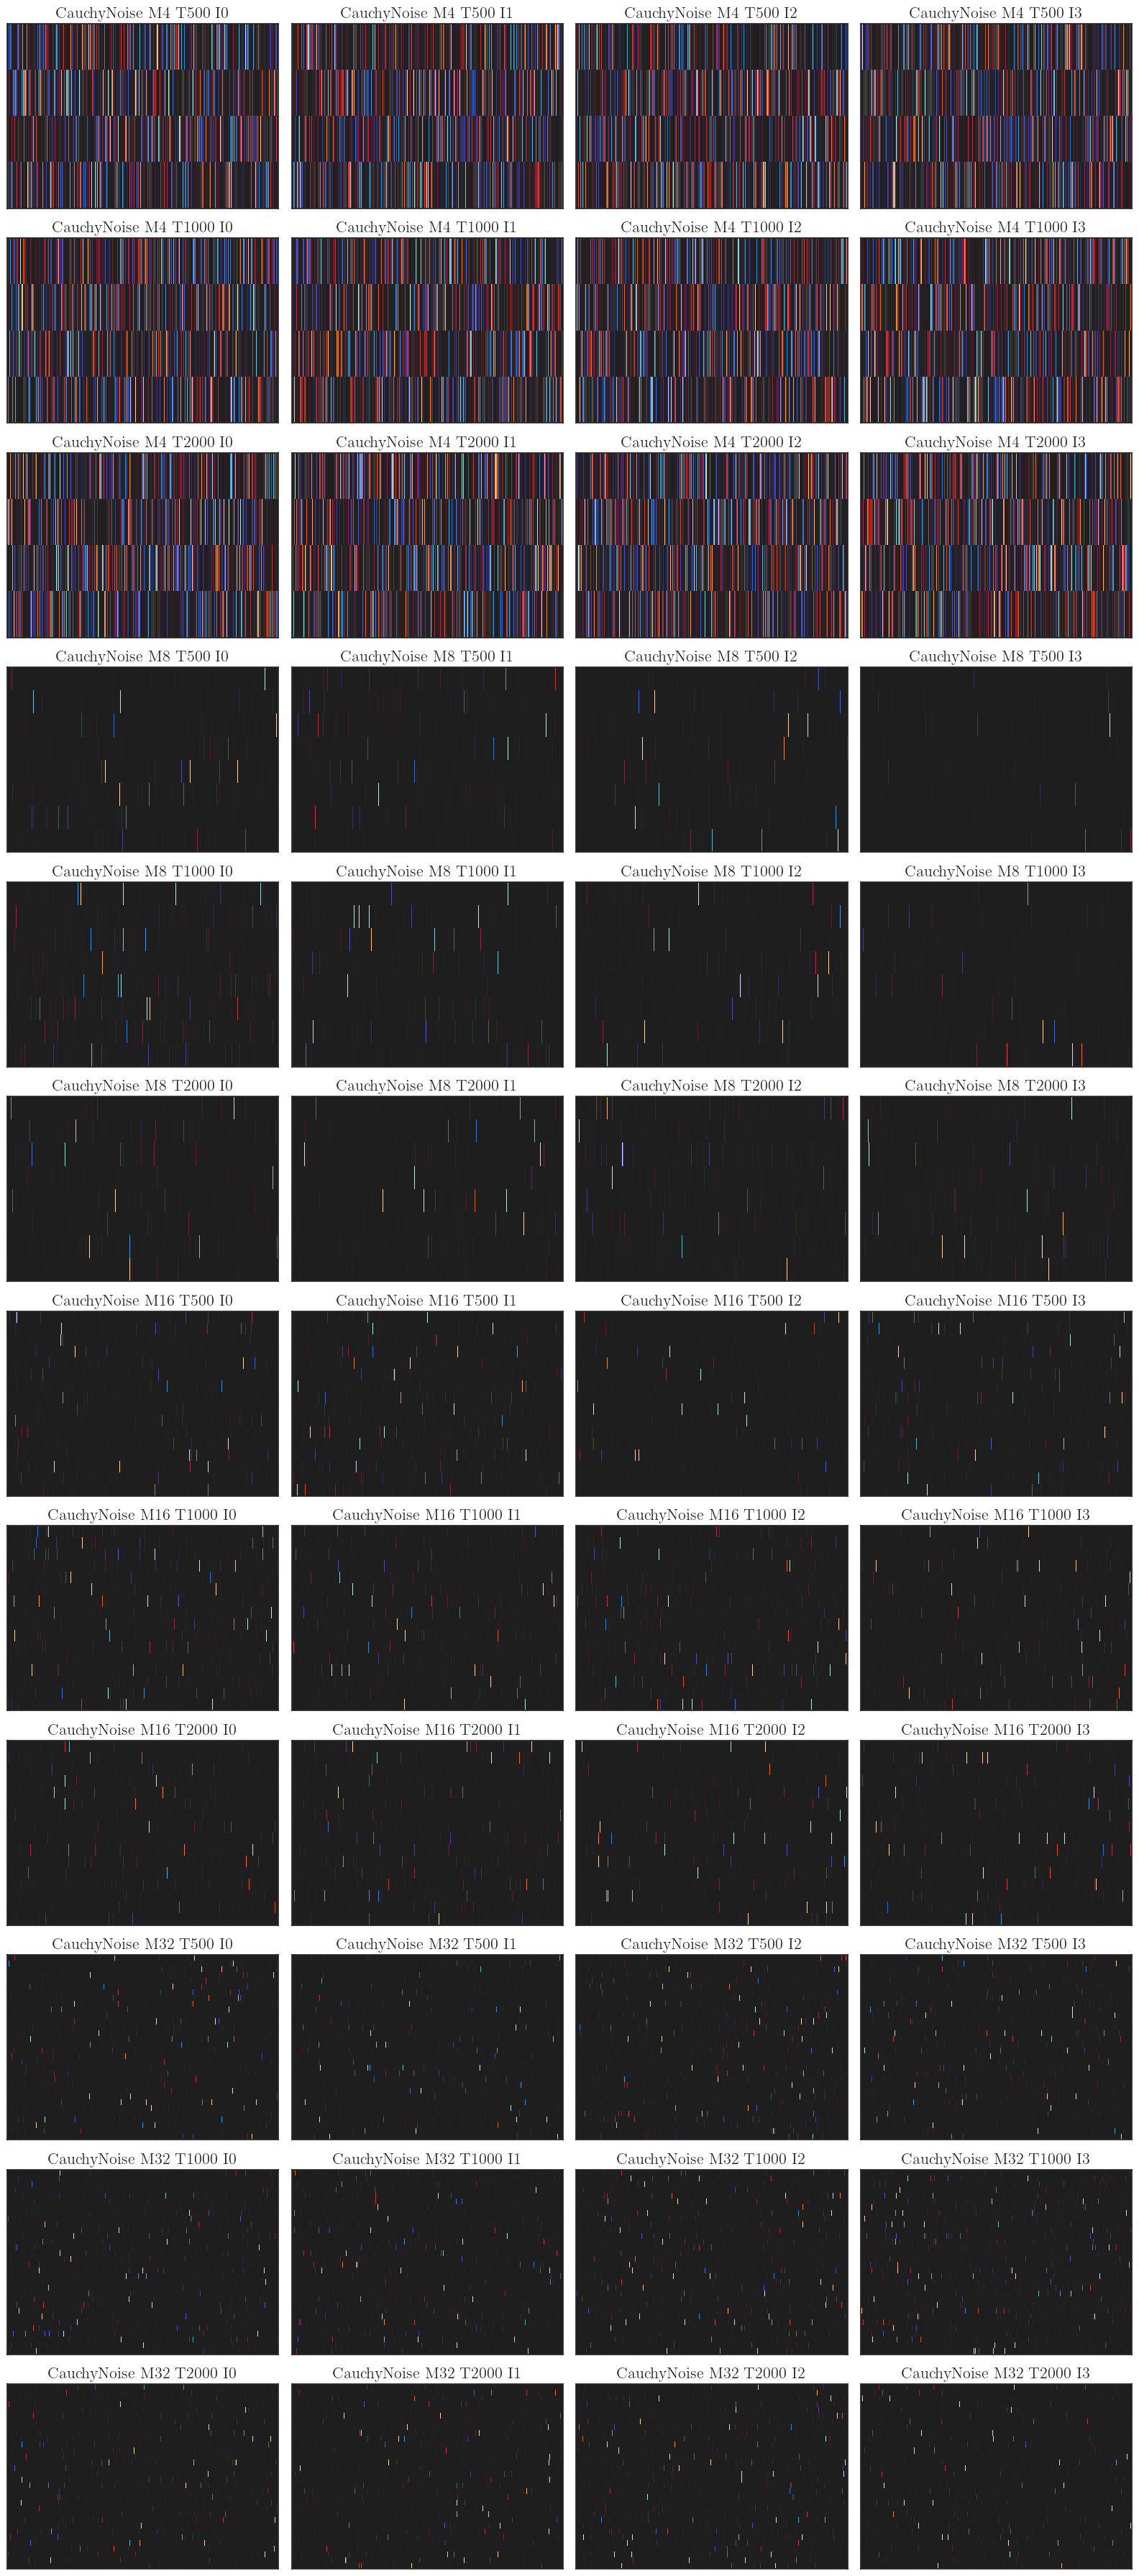

In [69]:
n = len(generated_data)
cols = min(4, n)
rows = (n + cols - 1) // cols
figsize = (4 * cols, 3 * rows)

fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False)
axes_flat = axes.ravel()

for i, item in enumerate(generated_data):
    ax = axes_flat[i]
    dat = item["data"]
    title = item["title"]
    if "CML" in title or "Logistic" in title:
        vmin, vmax = -2, 2
        
    elif "Cauchy" in title:
        vlims = np.percentile(dat, (0.1, 99.9))
        vlim = max(np.abs(vlims))
        vmin, vmax = -vlim, vlim
        
    else:
        vmin, vmax = -2, 2

    ax.pcolormesh(dat, cmap=sns.color_palette('icefire', as_cmap=True), 
                  vmin=vmin, vmax=vmax)
    
    ax.tick_params(which='both', bottom=False, top=False, left=False, right=False,
                   labelbottom=False, labelleft=False)
    ax.invert_xaxis()
    ax.set_title(title)

for ax in axes_flat[n:]:
    ax.axis("off")

fig.tight_layout()
plt.show()

In [82]:
import src.visualization
importlib.reload(src.visualization)
from src.visualization import scale_mts_heatmap
scale_mts_heatmap("data/full-big")


# saves timeseries_scaled.svg alongside timeseries.npy


[WindowsPath('data/full-big/CauchyNoise/M16_T1000_I0/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I1/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I10/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I11/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I12/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I13/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I14/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I15/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I16/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I17/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I18/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M16_T1000_I19/mts_heatmap_scaled.svg'),
 WindowsPath('data/full-big/CauchyNoise/M1